# Web Scraping and Introductory Data Analysis

Welcome to Homework 0, where we will delve into web scraping and perform an introductory data analysis. This homework will be a hands-on exercise that will help you become familiar with the process of extracting data from websites and conducting basic statistical analysis. 

## Objectives

By the end of this homework, you will be able to:

1. Set up a Python environment with the necessary libraries for web scraping and data analysis.
2. Write a web scraping script using Beautiful Soup and Selenium to collect data from a website.
3. Sample from the collected dataset and compare the statistics of the sample and the population.
   
## Tasks

1. **Environment Setup**: Install the required libraries such as Beautiful Soup, Selenium, pandas, numpy, matplotlib, and seaborn.

2. **Web Scraping**: Write a script to scrape transaction data from [Etherscan.io](https://etherscan.io/txs). Use Selenium to interact with the website and Beautiful Soup to parse the HTML content.

3. **Data Sampling**: Once the data is collected, create a sample from the dataset. Compare the sample statistics (mean and standard deviation) with the population statistics.


## Deliverables

1. A Jupyter notebook with all the code and explanations.
2. A detailed report on the findings, including the comparison of sample and population statistics.
Note: You can include the report in your notebook.

## Getting Started

Begin by setting up your Python environment and installing the necessary libraries. Then, proceed with the web scraping task, ensuring that you handle any potential issues such as rate limiting. Once you have the data, move on to the data sampling and statistical analysis tasks. 

Remember to document your process and findings in the Jupyter notebook, and to include visualizations where appropriate to illustrate your results. <br>
Good luck, and happy scraping!

## Data Collection (Etherscan)

In this section, we will use web scraping to gather transaction data from the Ethereum blockchain using the Etherscan block explorer. Our objective is to collect transactions from the **last 10 blocks** on Ethereum.

To accomplish this task, we will employ web scraping techniques to extract the transaction data from the Etherscan website. The URL we will be targeting for our data collection is:

[https://etherscan.io/txs](https://etherscan.io/txs)

### Steps

1. **Navigate to the URL**: Use Selenium to open the Etherscan transactions page in a browser.

2. **Locate the Transaction Data**: Identify the HTML elements that contain the transaction data for the specified block range.

3. **Extract the Data**: Write a script to extract the transaction details e.g. Hash, Method, Block, etc.

4. **Handle Pagination**: If the transactions span multiple pages, implement pagination handling to navigate through the pages and collect all relevant transaction data.

5. **Store the Data**: Save the extracted transaction data into a structured format, such as a CSV file or a pandas DataFrame, for further analysis.

### Considerations

- **Rate Limiting**: Be mindful of the website's rate limits to avoid being blocked. Implement delays between requests if necessary.
- **Dynamic Content**: The Etherscan website may load content dynamically. Ensure that Selenium waits for the necessary elements to load before attempting to scrape the data.
- **Data Cleaning**: After extraction, clean the data to remove any inconsistencies or errors that may have occurred during the scraping process.

### Resources

- [Beautiful Soup Documentation](https://www.crummy.com/software/BeautifulSoup/bs4/doc/)
- [Selenium Documentation](https://selenium-python.readthedocs.io/)
- [Pandas Documentation](https://pandas.pydata.org/docs/)
- [Ethereum](https://ethereum.org/en/)

In [61]:
from bs4 import BeautifulSoup
from selenium import webdriver
import pandas as pd
import time
import re

In [62]:
def extract_wallet_address(column):
    pattern = r"\((0x[0-9a-fA-F]+)\)"
    match = re.search(pattern, str(column))

    if match:
        wallet_address = match.group(1)
    else:
        pattern2 = r"data-clipboard-text=\"0x[0-9a-fA-F]+"
        match = re.search(pattern2, str(column))

        if match:
            wallet_address = match.group().replace('data-clipboard-text=\"', '')
        else:
            wallet_address = None
            
    return wallet_address

In [ ]:
BLOCK = 10 
PAGE_LOAD = 100 #This could be 100, 50 or 10

options = webdriver.FirefoxOptions()
#options = webdriver.ChromeOptions()
# options.add_argument('--headless')  # no GUI#
#driver = webdriver.Chrome(options=options)
driver = webdriver.Firefox(options=options)

block_counter = 0
page_counter = 1
prev = []

hash_list = []
block_list = []
age_list = []
from_list = []
to_list = []
value_list = []
txn_fee_list = []

By utilizing the BeautifulSoup and Selenium libraries, we collected transactions from 10 blocks. There are two constant variables, BLOCK and PAGE_LOAD, which determine the number of blocks the user wishes to gather and how many transactions the user wants to scrape in each iteration.

There are two options for the webdriver: either Firefox or Google Chrome, which are commented out. (Note: On my device, using Google Chrome results in a privacy error, but Firefox opens perfectly. This may vary depending on your IP connection.)

In [ ]:
while(block_counter != BLOCK + 1):
    url = 'https://etherscan.io/txs?ps=' + str(PAGE_LOAD) +'&p=' + str(page_counter)
    driver.get(url)
    soup = BeautifulSoup(driver.page_source, 'html.parser')
    table = soup.find('tbody')
    rows = table.find_all('tr')[1:]  
   
    for row in rows[:PAGE_LOAD]:
        columns = row.find_all('td')    
        current_block = columns[3].text.strip()
        
        if(current_block not in prev):
            prev.append(current_block)
            block_counter += 1
        
        if(block_counter > BLOCK + 1):
            break;
        
        hash_list.append(columns[1].text.strip())
        block_list.append(current_block)
        age_list.append(columns[5].text.strip())
        from_list.append(extract_wallet_address(columns[7]))
        to_list.append(extract_wallet_address(columns[9]))
        value_list.append(columns[10].text.strip())
        txn_fee_list.append(columns[11].text.strip())
        
    page_counter += 1

Let's delve into the algorithm: the URL format is https://etherscan.io/txs?ps=100&p=5, where 'ps' represents the number of transactions loaded in each URL, and 'p' represents the page number. Therefore, to gather transactions from 10 blocks, we iterate through each page, extracting the data of each transaction and appending it to its corresponding list. Once gathering is complete, we compile all the data into a pandas dataframe and save it to output.csv.

In [ ]:
df = pd.DataFrame({
    'Hash': hash_list,
    'Block': block_list,
    'Age': age_list,
    'From': from_list,
    'To': to_list,
    'Value': value_list,
    'Txn Fee': txn_fee_list
})

driver.quit()
df.to_csv('output.csv', index=False)

## Data Analysis

Now that we have collected the transaction data from Etherscan, the next step is to perform conduct an initial analysis. This task will involve the following steps:

1. **Load the Data**: Import the collected transaction data into a pandas DataFrame.

2. **Data Cleaning**: Clean the data by converting data types, removing any irrelevant information, and handling **duplicate** values.

3. **Statistical Analysis**: Calculate the mean and standard deviation of the population. Evaluate these statistics to understand the distribution of transaction values. The analysis and plotting will be on **Txn Fee** and **Value**.

4. **Visualization**: This phase involves the creation of visual representations to aid in the analysis of transaction values. The visualizations include:
    - A histogram for each data column, which provides a visual representation of the data distribution. The selection of bin size is crucial and should be based on the data's characteristics to ensure accurate representation. Provide an explanation on the bin size selection!
    - A normal distribution plot fitted alongside the histogram to compare the empirical distribution of the data with the theoretical normal distribution.
    - A box plot and a violin plot to identify outliers and provide a comprehensive view of the data's distribution.

### Deliverables

The project aims to deliver the following deliverables:

- A refined pandas DataFrame containing the transaction data, which has undergone thorough cleaning and is ready for analysis.
- A simple statistical analysis evaluating the population statistics, offering insights into the distribution of transaction values and fees.
- A set of visualizations showcasing the distribution of transaction values for the population. These visualizations include histograms, normal distribution plots, box plots, and violin plots, each serving a specific purpose in the analysis.

### Getting Started

The project starts with the importing of transaction data into a pandas DataFrame, setting the stage for data manipulation and analysis. Subsequent steps involve the cleaning of the data to ensure its quality and reliability. Followed by the calculation of population statistics. Finally, a series of visualizations are created to visually analyze the distribution of transaction values and fees.

In [107]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import norm, poisson
import numpy as np
import math

## Data Cleaning :

We've already extracted the data from the website, but it still needs to be cleaned up. Firstly, we need to eliminate any extraneous information, such as 'ETH' from the 'value' column. Additionally, due to dynamic data loading, we must remove any duplicate rows.
Since there are too many zeros in the data set,  we considered an epsilon for zero, and we tend to consider 'wei which is smallest denomination of ether. Once these  accomplished, we'll be good to go!

In [108]:
df = pd.read_csv('output.csv')
df['Value'] = df['Value'].str.rstrip(' ETH')
df['Value'] = df['Value'].apply(lambda x: float(x.rstrip(' wei')) *10**-18 if x.endswith('wei') else (x))

df['Value'] = df['Value'].astype(float)
df['Value'] = df['Value'].replace(0.0, 10**-18)
df['Value'] = df['Value'].replace(0, 10**-18)

df['Txn Fee'] = df['Txn Fee'].astype(float)

df = df.drop_duplicates(subset='Hash', keep='first')
df.to_csv('output_cleaned_epsilon.csv', index=False)

## Data Analysis :


In [109]:
mean_value = df['Value'].mean()
std_value = df['Value'].std()

mean_txn_fee = df['Txn Fee'].mean()
std_txn_fee = df['Txn Fee'].std()

print(f"Value - Mean: {mean_value}, Standard Deviation: {std_value}")
print(f"Txn Fee - Mean: {mean_txn_fee}, Standard Deviation: {std_txn_fee}")

Value - Mean: 0.4429613353563692, Standard Deviation: 5.118537271456196
Txn Fee - Mean: 0.006326284373388345, Standard Deviation: 0.03817592629810732


The standard deviation was found to be higher than the mean, indicating a notable degree of variability within our dataset. This suggests that our data points are quite spread out from the average.

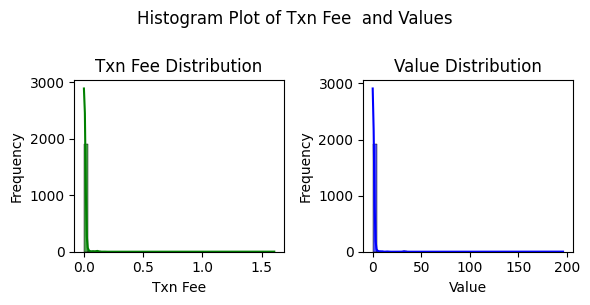

In [110]:
plt.figure(figsize=(6, 3))
plt.suptitle('Histogram Plot of Txn Fee  and Values', y=1) 

plt.subplot(1, 2, 1)
sns.histplot(df['Txn Fee'], bins=int(math.sqrt(len(df['Txn Fee']))), color='g', kde=True, alpha=0.7)
plt.title('Txn Fee Distribution')
plt.xlabel('Txn Fee')
plt.ylabel('Frequency')

plt.subplot(1, 2, 2)
sns.histplot(df['Value'], bins=int(math.sqrt(len(df['Value']))), color='b', kde=True, alpha=0.7)
plt.title('Value Distribution')
plt.xlabel('Value')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

When dealing with a small set of data (less than 30 points), it's better to use a simpler approach for determining the bin size in a histogram. Instead of using the Sturges formula, which may not work well with such a small dataset, we opted for the square root rule. This choice helps in creating a histogram that effectively represents the continuity of the data, especially considering the limited number of data points and the relatively low values in our dataset.

### Skewness and Kurtosis Tests: 

To dive deeper into our investigation, we employ the computation of skewness and kurtosis. Skewness is determined through the third central moment, while kurtosis is assessed using the fourth central moment.

In [111]:
from scipy.stats import skew, kurtosis

skewness_value = skew(df['Value'])
kurtosis_value = kurtosis(df['Value'])

print(f"Value Skewness: {skewness_value}")
print(f"Value Kurtosis: {kurtosis_value}")

skewness_value = skew(df['Txn Fee'])
kurtosis_value = kurtosis(df['Txn Fee'])

print(f"Txn FeeSkewness  : {skewness_value}")
print(f"Txn Fee Kurtosis: {kurtosis_value}")

Value Skewness: 30.954918843476335
Value Kurtosis: 1121.6957076096298
Txn FeeSkewness  : 38.30979714639741
Txn Fee Kurtosis: 1596.0740620151823


The skewness, representing the 3rd central moment, positive indicates a right-skewed distribution characterized by a moderate tail on the right side. Concurrently, the negative kurtosis, denoting the 4th central moment, implies a distribution with a less peaked and lighter tails than a normal distribution. The fact that the kurtosis is less than zero signifies that the distribution has thinner tails compared to a normal distribution.

**The x-axis of the distribution of transaction fees is set to logarithmic scale, which helps in visualizing the distribution of transaction fees more effectively.**

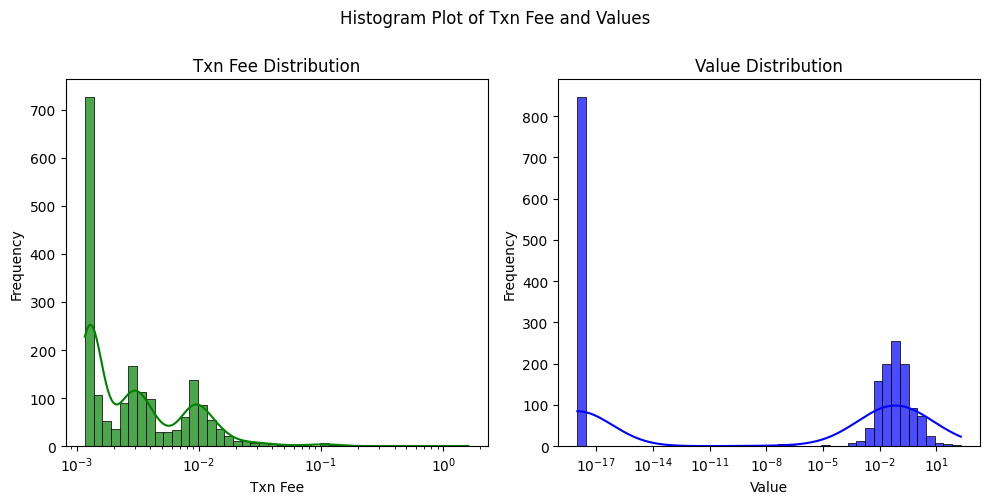

In [112]:
plt.figure(figsize=(10, 5))
plt.suptitle('Histogram Plot of Txn Fee and Values', y=1) 

plt.subplot(1, 2, 1)
plt.xscale('log')
sns.histplot(df['Txn Fee'], bins=int(math.sqrt(len(df['Txn Fee']))), color='g', kde=True, alpha=0.7)
plt.title('Txn Fee Distribution')
plt.xlabel('Txn Fee')
plt.ylabel('Frequency')

plt.subplot(1, 2, 2)
plt.xscale('log')
sns.histplot(df['Value'], bins=int(math.sqrt(len(df['Value']))), color='b', kde=True, alpha=0.7)
plt.title('Value Distribution')
plt.xlabel('Value')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()


As it currently stands from the subplots, the majority of transactions fall within the value range of 0 to 0.05. The reason for this is that most of the transactions involve coin swaps. In other words, individuals involved in the transactions are simply exchanging one coin for another within the same network, or in some cases, using coins to unlock transactions (especially when gaining "Meme Coins"). It is important to note, however, that  does not justify the high frequency of Txn Fee at $10^{-17}$ or lower, as some of the transactions with zero value have significantly larger Txn fees.


The following plot we have is based on the data after we removed the rows with very small values. This was done in order to exclude the coin-swap transactions and coin submittions. The x-axis of the distribution of transaction fees is set to logarithmic scale

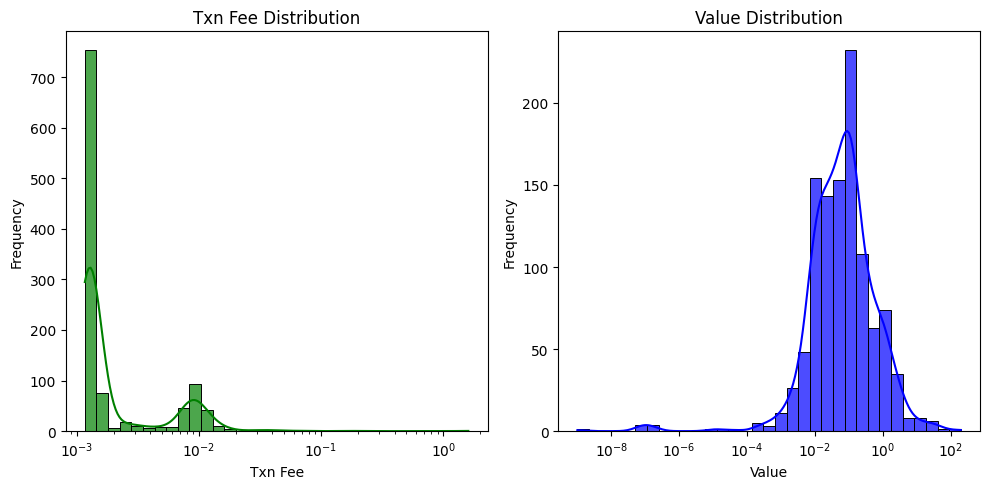

In [113]:
non_zero_df = df[df['Value'] > 10**-15]

plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.xscale('log')
sns.histplot(non_zero_df['Txn Fee'], bins=int(math.sqrt(len(non_zero_df['Txn Fee']))), color='g', kde=True, alpha=0.7)
plt.title('Txn Fee Distribution')
plt.xlabel('Txn Fee')
plt.ylabel('Frequency')

plt.subplot(1, 2, 2)
plt.xscale('log')
sns.histplot(non_zero_df['Value'], bins=int(math.sqrt(len(non_zero_df['Value']))), color='b', kde=True, alpha=0.7)
plt.title('Value Distribution')
plt.xlabel('Value')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

### Fitting Normal and Poisson Distribution :

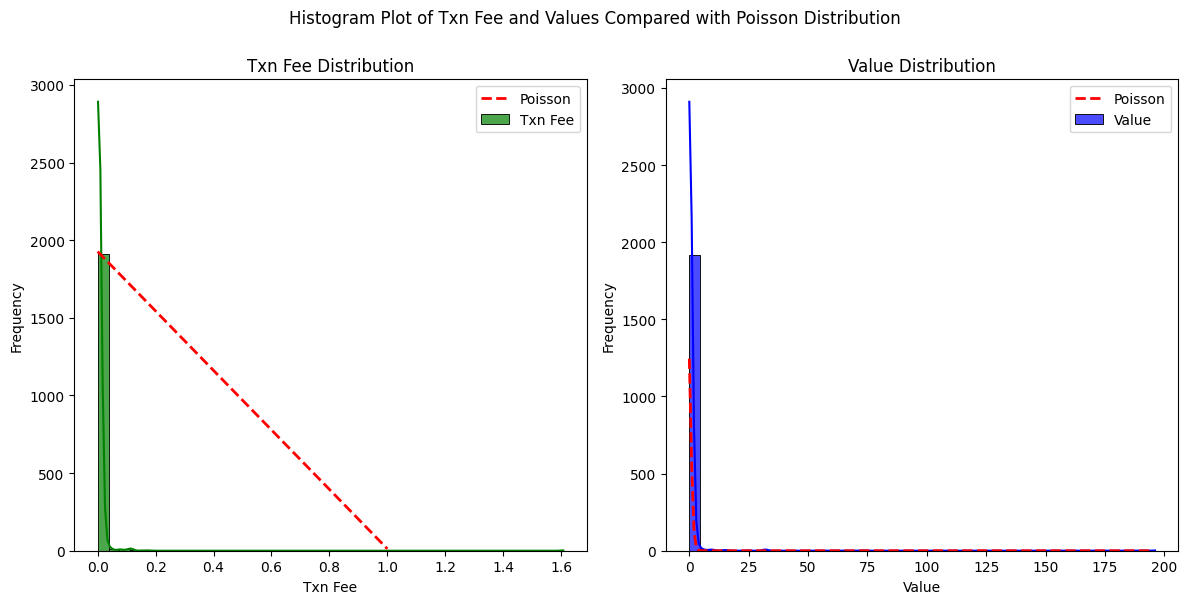

In [114]:
from scipy.stats import poisson
import math

plt.figure(figsize=(12, 6))
plt.suptitle('Histogram Plot of Txn Fee and Values Compared with Poisson Distribution', y=1) 

plt.subplot(1, 2, 1)
sns.histplot(df['Txn Fee'], bins=int(math.sqrt(len(df['Txn Fee']))), color='g', kde=True, alpha=0.7, label='Txn Fee')
plt.title('Txn Fee Distribution')
plt.xlabel('Txn Fee')
plt.ylabel('Frequency')

mu_txn_fee = df['Txn Fee'].mean()
x_txn_fee = np.arange(0, df['Txn Fee'].max())
poisson_txn_fee = poisson.pmf(x_txn_fee, mu_txn_fee) * len(df['Txn Fee'])
plt.plot(x_txn_fee, poisson_txn_fee, color='r', linestyle='dashed', linewidth=2, label='Poisson')
plt.legend()

plt.subplot(1, 2, 2)
sns.histplot(df['Value'], bins=int(math.sqrt(len(df['Value']))), color='b', kde=True, alpha=0.7, label='Value')
plt.title('Value Distribution')
plt.xlabel('Value')
plt.ylabel('Frequency')

mu_value = df['Value'].mean() 
x_value = np.arange(0, df['Value'].max())
poisson_value = poisson.pmf(x_value, mu_value) * len(df['Value'])
plt.plot(x_value, poisson_value, color='r', linestyle='dashed', linewidth=2, label='Poisson')
plt.legend()

plt.tight_layout()
plt.show()


**Based on the plot, value distribution seems to follow a Poisson distribution.**


Scaling factor Txn Fee 311.508449203
Scaling factor Value 38004.4


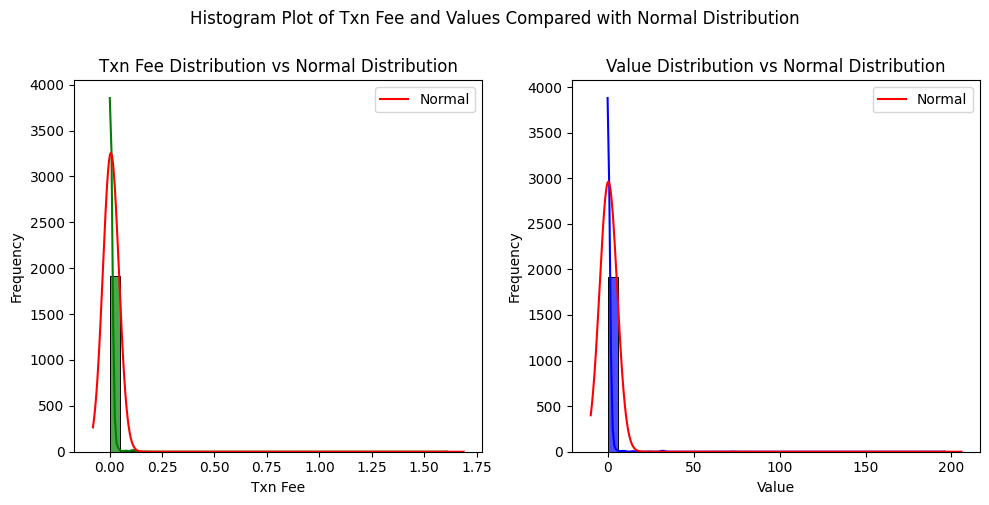

In [115]:
plt.figure(figsize=(10, 5))
plt.suptitle('Histogram Plot of Txn Fee and Values Compared with Normal Distribution', y=1) 

plt.subplot(1, 2, 1)
sns.histplot(df['Txn Fee'], bins=int(math.sqrt(len(non_zero_df['Txn Fee']))), color='g', kde=True, alpha=0.7)
mu_txn_fee = df['Txn Fee'].mean()
sigma_txn_fee = df['Txn Fee'].std()


scaling_factor = len(df['Txn Fee']) * np.diff(np.histogram(df['Txn Fee'])[1])[0]
print("Scaling factor Txn Fee",scaling_factor)


xmin, xmax = plt.xlim()
txn_fee_x = np.linspace(xmin, xmax, 1000)
txn_fee_norm = norm.pdf(txn_fee_x, mu_txn_fee, sigma_txn_fee) * scaling_factor

plt.plot(txn_fee_x, txn_fee_norm, color='r', label='Normal')

plt.title('Txn Fee Distribution vs Normal Distribution')
plt.xlabel('Txn Fee')
plt.ylabel('Frequency')
plt.legend()

plt.subplot(1, 2, 2)
sns.histplot(df['Value'], bins=int(math.sqrt(len(non_zero_df['Value']))), color='b', kde=True, alpha=0.7)
mu_value = df['Value'].mean()
sigma_value = df['Value'].std()
scaling_factor = np.diff(np.histogram(df['Value'])[1])[0] * len(df['Value'])
print("Scaling factor Value",scaling_factor)


xmin, xmax = plt.xlim()
value_x = np.linspace(xmin, xmax, 1000)
value_norm = norm.pdf(value_x, mu_value, sigma_value) * scaling_factor


plt.plot(value_x, value_norm, color='r', label='Normal')

plt.title('Value Distribution vs Normal Distribution')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.legend()
plt.tight_layout()
plt.show()

The scaling factor  is computed by multiplying the total number of observations in the dataset by the width of each histogram bin. This product represents the total area under the histogram, serving as a scaling factor to adjust the theoretical normal distribution curve. By scaling the normal distribution to match the observed data's total area, the comparison between the empirical distribution and the expected normal distribution is facilitated, aiding in visualizing their alignment or deviations.


### Violin and Box Plots : 


And finally, the Violin and Box plots. For better visualization, we set the log_scale to True.

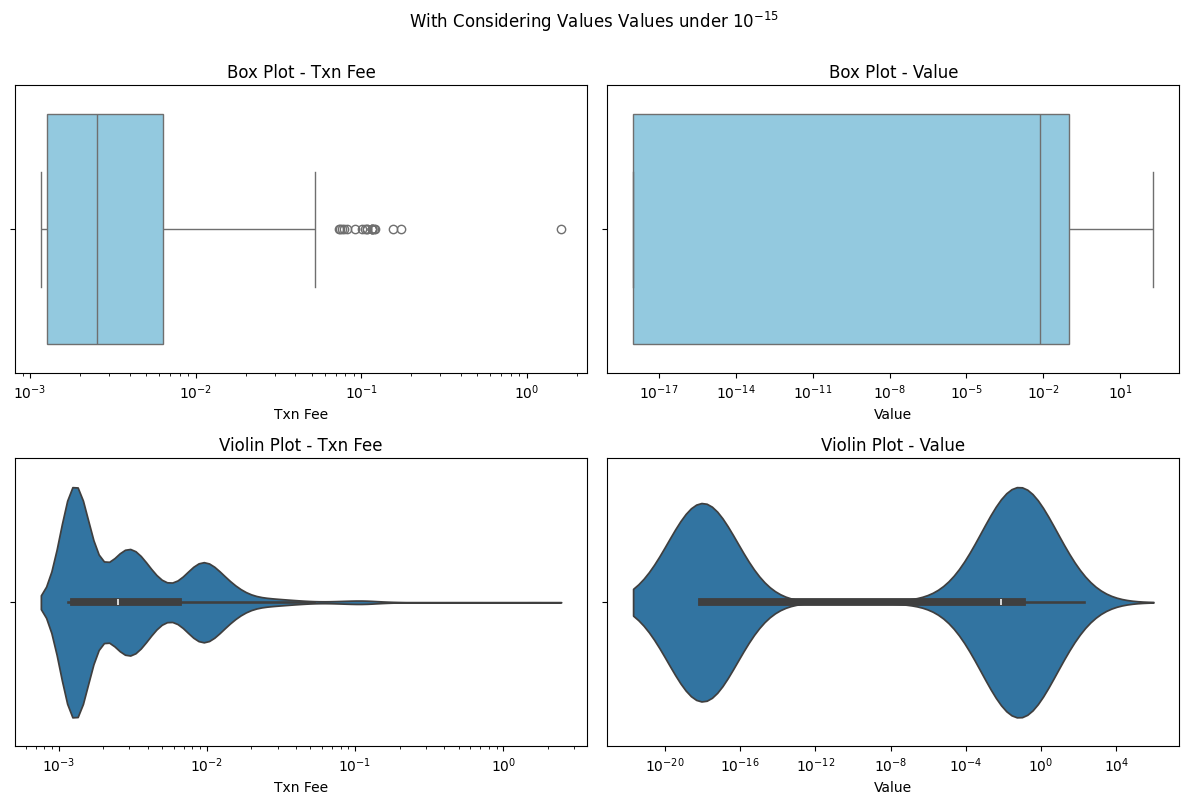

In [116]:
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(12, 8))
plt.suptitle('With Considering Values Values under $10^{-15}$', y=1) 
sns.boxplot(x=df['Txn Fee'], ax=axes[0, 0], log_scale=True,color= 'skyblue')
axes[0, 0].set_title('Box Plot - Txn Fee')

sns.violinplot(x=df['Txn Fee'], ax=axes[1,0], log_scale=True)
axes[1,0].set_title('Violin Plot - Txn Fee')

sns.boxplot(x=df['Value'], ax=axes[0, 1], log_scale=True,color= 'skyblue')
axes[0, 1].set_title('Box Plot - Value')

sns.violinplot(x=df['Value'], ax=axes[1, 1], log_scale=True)
axes[1, 1].set_title('Violin Plot - Value')

plt.tight_layout()
plt.show()


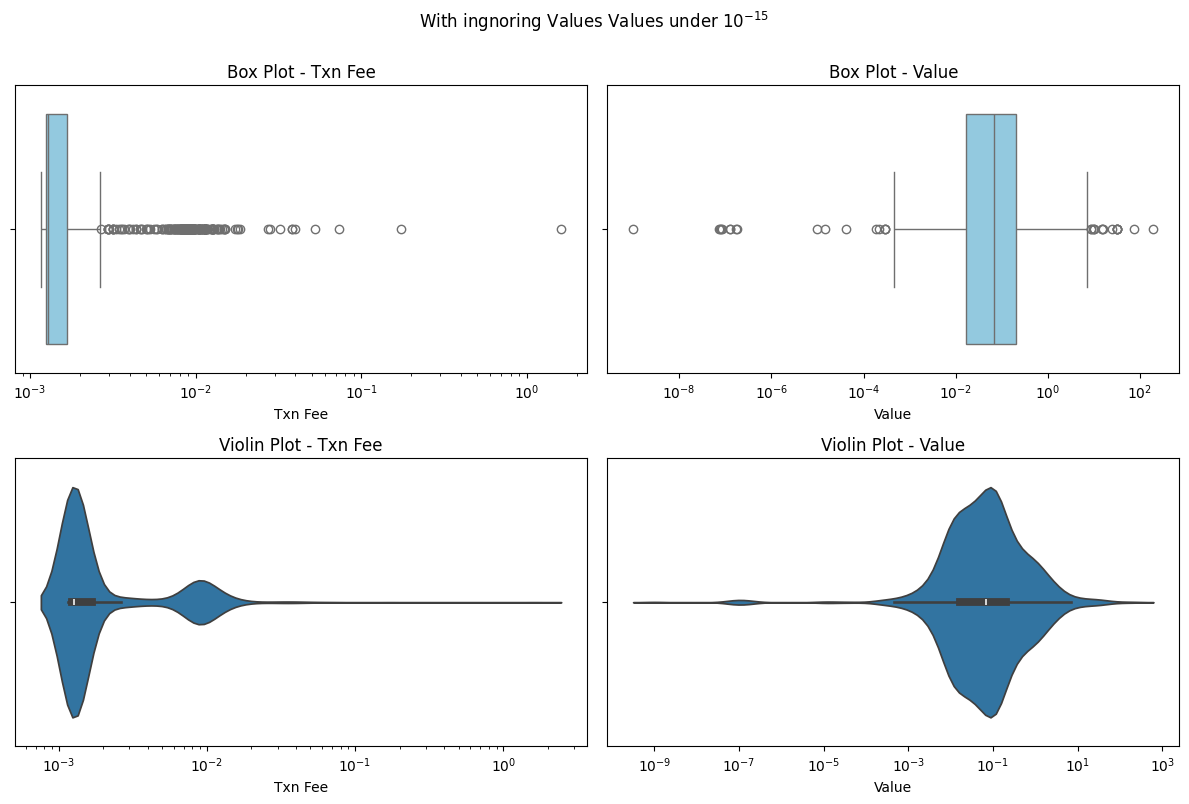

In [118]:
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(12, 8))
plt.suptitle('With ingnoring Values Values under $10^{-15}$', y=1) 

sns.boxplot(x=non_zero_df['Txn Fee'], ax=axes[0, 0], log_scale=True,color= 'skyblue')
axes[0, 0].set_title('Box Plot - Txn Fee')

sns.violinplot(x=non_zero_df['Txn Fee'], ax=axes[1,0], log_scale=True)
axes[1,0].set_title('Violin Plot - Txn Fee')

sns.boxplot(x=non_zero_df['Value'], ax=axes[0, 1], log_scale=True,color= 'skyblue')
axes[0, 1].set_title('Box Plot - Value')

sns.violinplot(x=non_zero_df['Value'], ax=axes[1, 1], log_scale=True)
axes[1, 1].set_title('Violin Plot - Value')

plt.tight_layout()
plt.show()


## Data Sampling and Analysis

In this section, we will delve into the process of data sampling and perform an initial analysis on the transaction data we have collected. Our objective is to understand the distribution of transaction values by sampling the data and comparing the sample statistics with the population statistics.

### Steps

1. **Load the Data**: Import the collected transaction data into a pandas DataFrame.

2. **Data Cleaning**: Clean the data by handling missing values, converting data types, and removing any irrelevant information.

3. **Simple Random Sampling (SRS)**: Create a sample from the dataset using a simple random sampling method. This involves randomly selecting a subset of the data without regard to any specific characteristics of the data.

4. **Stratified Sampling**: Create another sample from the dataset using a stratified sampling method. This involves dividing the data into strata based on a specific characteristic (e.g., transaction value) and then randomly selecting samples from each stratum. Explain what you have stratified the data by and why you chose this column.

5. **Statistical Analysis**: Calculate the mean and standard deviation of the samples and the population. Compare these statistics to understand the distribution of transaction values.

6. **Visualization**: Plot the distribution of transaction values and fees for both the samples and the population to visually compare their distributions.

### Considerations

- **Sample Size**: The size of the sample should be large enough to represent the population accurately but not so large that it becomes impractical to analyze.
- **Sampling Method**: Choose the appropriate sampling method based on the characteristics of the data and the research question.

Explain the above considerations in your report.

Now, we're going to take a sample from the filtered data with two ways:

1. Simple Random Sampling (SRS) :Here, we choose 9 percent of the population as the size of our sample, which is less than 10, leading to semi-independent variables.

In [131]:
import random 

SAMPLE_PERCENTAGE = 9
sample_size = len(df) * SAMPLE_PERCENTAGE // 100
df_srs = df.sample(n = sample_size, random_state=random.randint(1, 10000000))

2. Stratified Sampling: Here, we choose block to stratify the data because it will classify the data in the best way possible (for this data we have). Factors like time is a little bit misleading because the data is loaded dynamically.




In [132]:
def sample_from_each_group(group):
    return group.sample(frac=0.09, random_state = random.randint(1, 1000000))

df_ss = df.groupby('Block').apply(sample_from_each_group)

print("Number of elements in  Stratified Sampling data frame:", len(df_ss))
print("Number of elements in Simple Random Sampling data frame:", len(df_srs))
print("Number of elements in data frame:", len(df))



Number of elements in  Stratified Sampling data frame: 176
Number of elements in Simple Random Sampling data frame: 174
Number of elements in data frame: 1939


In both cases, we choose a random number from 1 to 1000000 for random_state, which is the seed.

First, let's compare the mean and std value of population, Simple Random Sample, and Stratified Sample:

In [136]:
print(f"Txn Fee mean of Population is {df['Txn Fee'].mean()}")
print(f"Txn Fee mean of Simple Random Sample is {df_srs['Txn Fee'].mean()}")
print(f"Txn Fee mean of Stratified Sample is {df_ss['Txn Fee'].mean()}")
print("--------------")
print(f"Value mean of Population is {df['Value'].mean()}")
print(f"Value mean of Simple Random Sample is {df_srs['Value'].mean()}")
print(f"Value mean of Stratified Sample is {df_ss['Value'].mean()}")
print("--------------")
print(f"Txn Fee std of Population is {df['Txn Fee'].std()}")
print(f"Txn Fee std of Simple Random Sample is {df_srs['Txn Fee'].std()}")
print(f"Txn Fee std of Stratified Sample is {df_ss['Txn Fee'].std()}")
print("--------------")
print(f"Value std of Population is {df['Value'].std()}")
print(f"Value std of Simple Random Sample is {df_srs['Value'].std()}")
print(f"Value std of Stratified Sample is {df_ss['Value'].std()}")


Txn Fee mean of Population is 0.006326284373388345
Txn Fee mean of Simple Random Sample is 0.004700218735632184
Txn Fee mean of Stratified Sample is 0.004668085
--------------
Value mean of Population is 0.4429613353563692
Value mean of Simple Random Sample is 0.15954090853448277
Value mean of Stratified Sample is 0.6871611887556818
--------------
Txn Fee std of Population is 0.03817592629810732
Txn Fee std of Simple Random Sample is 0.008863476457311562
Txn Fee std of Stratified Sample is 0.007728744557101034
--------------
Value std of Population is 5.118537271456196
Value std of Simple Random Sample is 0.5007743753277348
Value std of Stratified Sample is 5.572446363640433


**The data indicates that employing Stratified Sampling results in more accurate representation and estimation of both the mean and standard deviation compared to SRS method.**

Now, we're going to compare samples with population. The plots should be on a same x-axis.

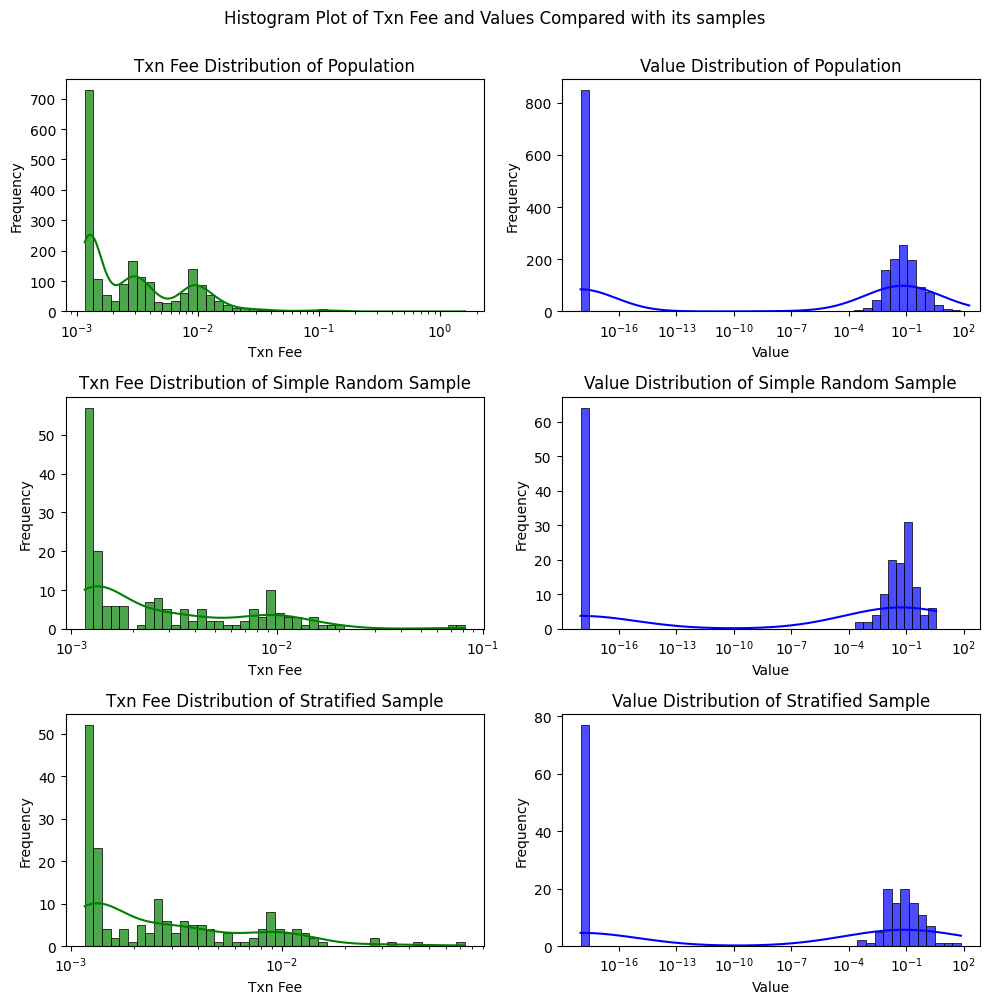

In [137]:
plt.figure(figsize=(10, 10))
plt.suptitle('Histogram Plot of Txn Fee and Values Compared with its samples', y=1) 


plt.subplot(3, 2, 1)
plt.xscale('log')
sns.histplot(df['Txn Fee'], bins=int(math.sqrt(len(df['Txn Fee']))), color='g', kde=True, alpha=0.7)
plt.title('Txn Fee Distribution of Population')
plt.xlabel('Txn Fee')
plt.ylabel('Frequency')


plt.subplot(3, 2, 2)
plt.xscale('log')
sns.histplot(df['Value'], bins=int(math.sqrt(len(df['Value']))), color='b', kde=True, alpha=0.7)
plt.title('Value Distribution of Population')
plt.xlabel('Value')
plt.ylabel('Frequency')


plt.subplot(3, 2, 3)
plt.xscale('log')
sns.histplot(df_srs['Txn Fee'], bins=int(math.sqrt(len(df['Txn Fee']))), color='g', kde=True, alpha=0.7)
plt.title('Txn Fee Distribution of Simple Random Sample')
plt.xlabel('Txn Fee')
plt.ylabel('Frequency')

plt.subplot(3, 2, 4)
plt.xscale('log')
sns.histplot(df_srs['Value'], bins=int(math.sqrt(len(df['Value']))), color='b', kde=True, alpha=0.7)
plt.title('Value Distribution of Simple Random Sample')
plt.xlabel('Value')
plt.ylabel('Frequency')

plt.subplot(3, 2, 5)
plt.xscale('log')
sns.histplot(df_ss['Txn Fee'], bins=int(math.sqrt(len(df['Txn Fee']))), color='g', kde=True, alpha=0.7)
plt.title('Txn Fee Distribution of Stratified Sample')
plt.xlabel('Txn Fee')
plt.ylabel('Frequency')

plt.subplot(3, 2, 6)
plt.xscale('log')
sns.histplot(df_ss['Value'], bins=int(math.sqrt(len(df['Value']))), color='b', kde=True, alpha=0.7)
plt.title('Value Distribution of Stratified Sample')
plt.xlabel('Value')
plt.ylabel('Frequency')

xlim = plt.gca().get_xlim()
for i in range(2, 7, 2):
    plt.subplot(3, 2,  i)
    plt.xlim(xlim[0], xlim[1])

plt.tight_layout()
plt.show()

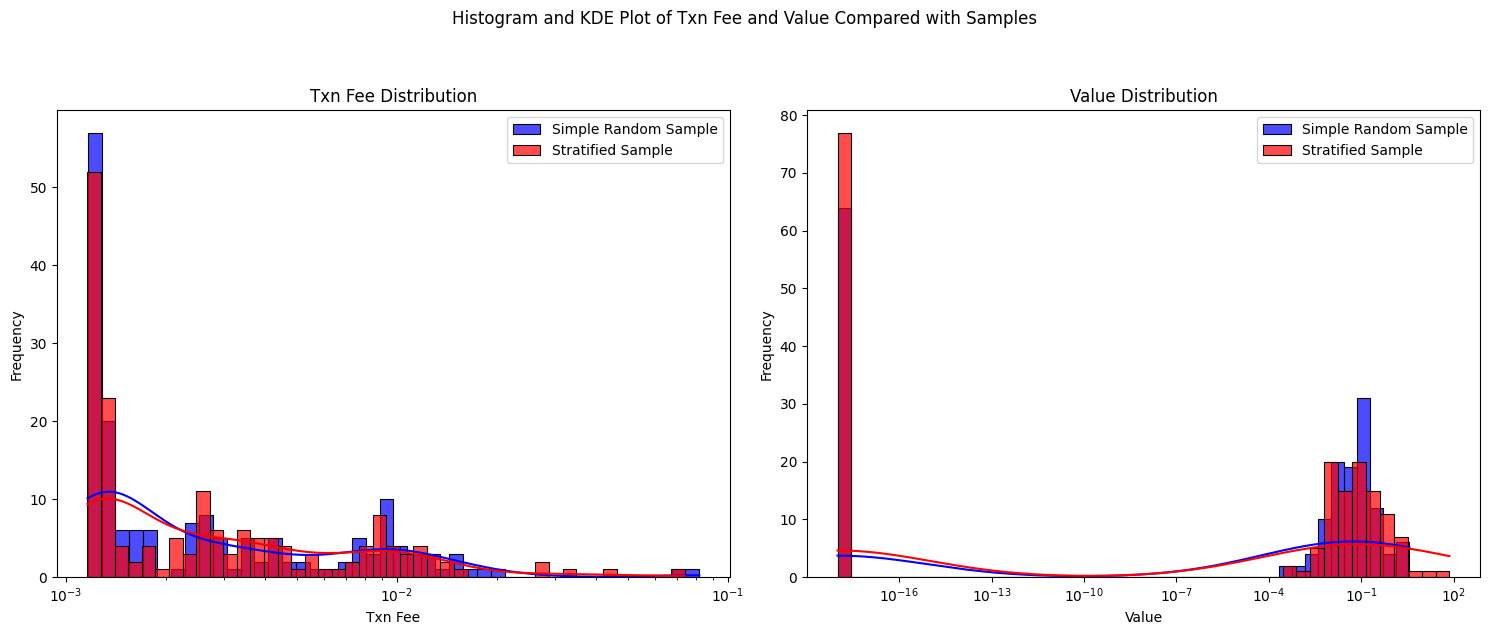

In [146]:
import matplotlib.pyplot as plt
import seaborn as sns
import math

plt.figure(figsize=(15, 6))
plt.suptitle('Histogram and KDE Plot of Txn Fee and Value Compared with Samples', y=1.05)

plt.subplot(1, 2, 1)
plt.xscale('log')
# sns.histplot(df['Txn Fee'], bins=int(math.sqrt(len(df['Txn Fee']))), color='g', kde=True, alpha=0.7, label='Population')
sns.histplot(df_srs['Txn Fee'], bins=int(math.sqrt(len(df['Txn Fee']))), color='b', kde=True, alpha=0.7, label='Simple Random Sample')
sns.histplot(df_ss['Txn Fee'], bins=int(math.sqrt(len(df['Txn Fee']))), color='r', kde=True, alpha=0.7, label='Stratified Sample')
plt.title('Txn Fee Distribution')
plt.xlabel('Txn Fee')
plt.ylabel('Frequency')
plt.legend()

plt.subplot(1, 2, 2)
plt.xscale('log')
# sns.histplot(df['Value'], bins=int(math.sqrt(len(df['Value']))), color='g', kde=True, alpha=0.7, label='Population')
sns.histplot(df_srs['Value'], bins=int(math.sqrt(len(df['Value']))), color='b', kde=True, alpha=0.7, label='Simple Random Sample')
sns.histplot(df_ss['Value'], bins=int(math.sqrt(len(df['Value']))), color='r', kde=True, alpha=0.7, label='Stratified Sample')
plt.title('Value Distribution')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.legend()

plt.tight_layout()
plt.show()


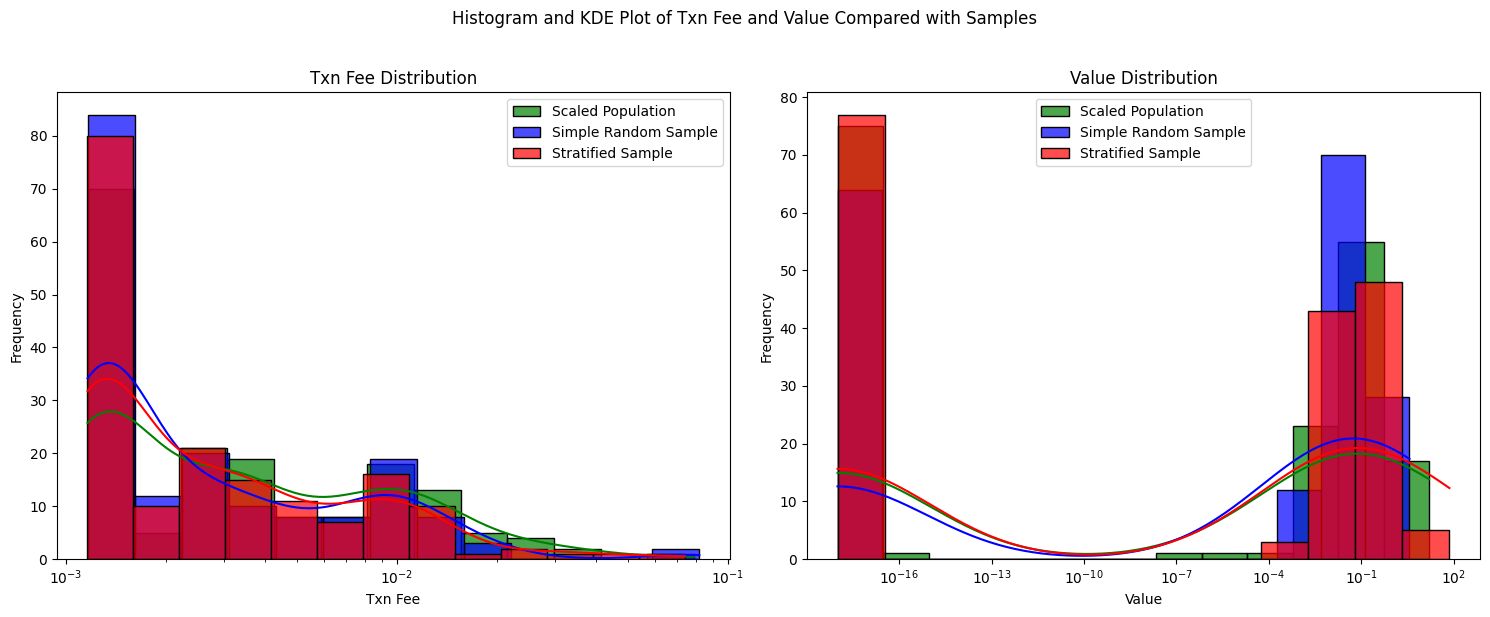

In [147]:
scaled_population = df.sample(n=len(df_srs), replace=True, random_state=42)

plt.figure(figsize=(15, 6))
plt.suptitle('Histogram and KDE Plot of Txn Fee and Value Compared with Samples', y=1.02)

plt.subplot(1, 2, 1)
plt.xscale('log')
sns.histplot(scaled_population['Txn Fee'], bins=int(math.sqrt(len(df_srs['Txn Fee']))), color='g', kde=True, alpha=0.7, label='Scaled Population')
sns.histplot(df_srs['Txn Fee'], bins=int(math.sqrt(len(df_srs['Txn Fee']))), color='b', kde=True, alpha=0.7, label='Simple Random Sample')
sns.histplot(df_ss['Txn Fee'], bins=int(math.sqrt(len(df_ss['Txn Fee']))), color='r', kde=True, alpha=0.7, label='Stratified Sample')
plt.title('Txn Fee Distribution')
plt.xlabel('Txn Fee')
plt.ylabel('Frequency')
plt.legend()

plt.subplot(1, 2, 2)
plt.xscale('log')
sns.histplot(scaled_population['Value'], bins=int(math.sqrt(len(df_srs['Value']))), color='g', kde=True, alpha=0.7, label='Scaled Population')
sns.histplot(df_srs['Value'], bins=int(math.sqrt(len(df_srs['Value']))), color='b', kde=True, alpha=0.7, label='Simple Random Sample')
sns.histplot(df_ss['Value'], bins=int(math.sqrt(len(df_ss['Value']))), color='r', kde=True, alpha=0.7, label='Stratified Sample')
plt.title('Value Distribution')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.legend()

plt.tight_layout()
plt.show()


### Calculating MSE for Both Sampling Methods :

In [160]:
mean_diff_squared = (df['Value'].mean() - df_srs['Value'].mean())**2
std_diff_squared = (df['Value'].std() - df_srs['Value'].std())**2
mse = np.mean([mean_diff_squared, std_diff_squared])

print("Mean Squared Error SRS:", mse)

mean_diff_squared = (df['Value'].mean() - df_ss['Value'].mean())**2
std_diff_squared = (df['Value'].std() - df_ss['Value'].std())**2
mse = np.mean([mean_diff_squared, std_diff_squared])

print("Mean Squared Error Stratified Sampling:", mse)

Mean Squared Error SRS: 10.702030651600307
Mean Squared Error Stratified Sampling: 0.13283351618388176


Lower Error rate for the Stratified Sampling method as expected.

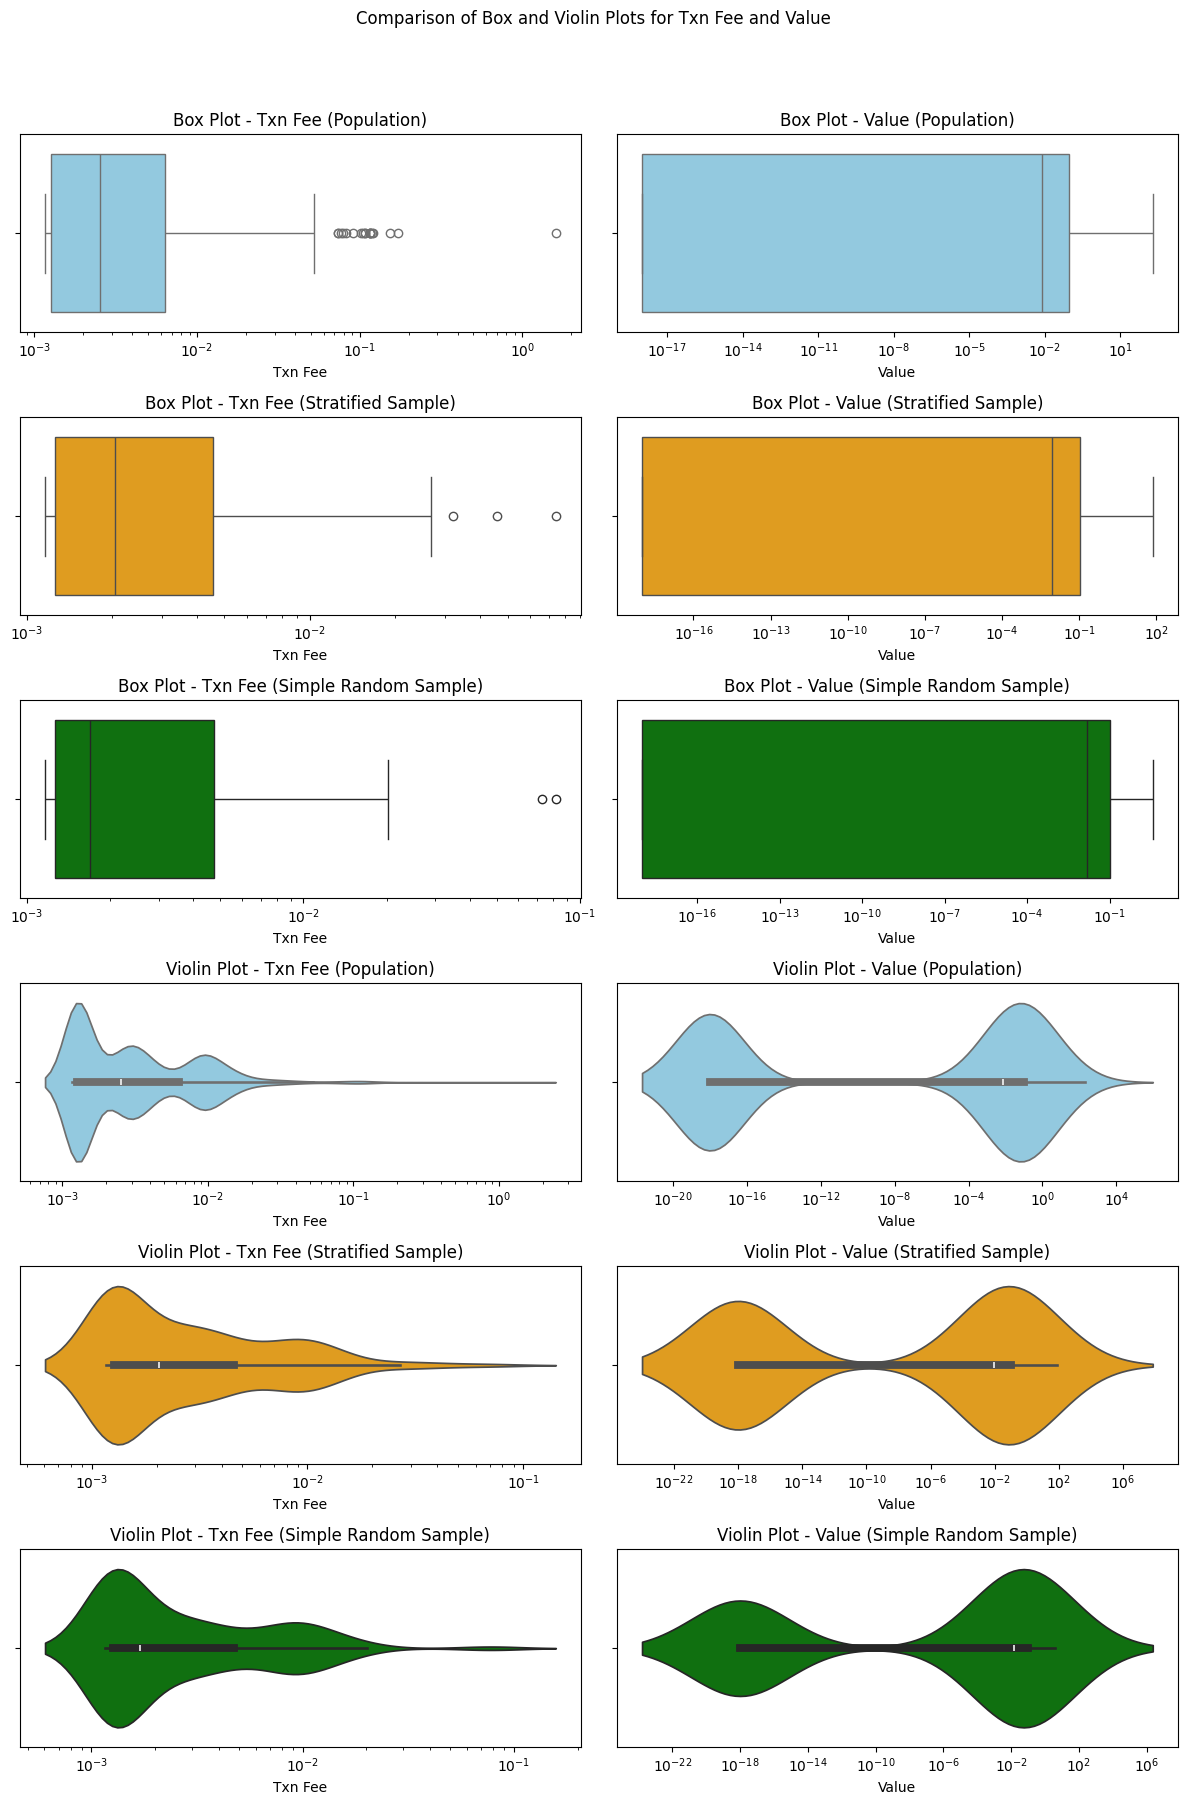

In [163]:
import matplotlib.pyplot as plt
import seaborn as sns


fig, axes = plt.subplots(nrows=6, ncols=2, figsize=(12, 18))
plt.suptitle('Comparison of Box and Violin Plots for Txn Fee and Value', y=1)

sns.boxplot(x=df['Txn Fee'], ax=axes[0, 0], log_scale=True, color='skyblue')
axes[0, 0].set_title('Box Plot - Txn Fee (Population)')

sns.boxplot(x=df_ss['Txn Fee'], ax=axes[1, 0], log_scale=True, color='orange')
axes[1, 0].set_title('Box Plot - Txn Fee (Stratified Sample)')

sns.boxplot(x=df_srs['Txn Fee'], ax=axes[2, 0], log_scale=True, color='green')
axes[2, 0].set_title('Box Plot - Txn Fee (Simple Random Sample)')

sns.violinplot(x=df['Txn Fee'], ax=axes[3, 0], log_scale=True, color='skyblue')
axes[3, 0].set_title('Violin Plot - Txn Fee (Population)')

sns.violinplot(x=df_ss['Txn Fee'], ax=axes[4, 0], log_scale=True, color='orange')
axes[4, 0].set_title('Violin Plot - Txn Fee (Stratified Sample)')

sns.violinplot(x=df_srs['Txn Fee'], ax=axes[5, 0], log_scale=True, color='green')
axes[5, 0].set_title('Violin Plot - Txn Fee (Simple Random Sample)')

sns.boxplot(x=df['Value'], ax=axes[0, 1], log_scale=True, color='skyblue')
axes[0, 1].set_title('Box Plot - Value (Population)')

sns.boxplot(x=df_ss['Value'], ax=axes[1, 1], log_scale=True, color='orange')
axes[1, 1].set_title('Box Plot - Value (Stratified Sample)')

sns.boxplot(x=df_srs['Value'], ax=axes[2, 1], log_scale=True, color='green')
axes[2, 1].set_title('Box Plot - Value (Simple Random Sample)')

sns.violinplot(x=df['Value'], ax=axes[3, 1], log_scale=True, color='skyblue')
axes[3, 1].set_title('Violin Plot - Value (Population)')

sns.violinplot(x=df_ss['Value'], ax=axes[4, 1], log_scale=True, color='orange')
axes[4, 1].set_title('Violin Plot - Value (Stratified Sample)')

sns.violinplot(x=df_srs['Value'], ax=axes[5, 1], log_scale=True, color='green')
axes[5, 1].set_title('Violin Plot - Value (Simple Random Sample)')

plt.tight_layout(rect=[0, 0, 1, 0.97])
plt.show()
